<a href="https://colab.research.google.com/github/shazmanshaz/Mean-Sea-Level-Langkawi/blob/main/Mean_Sea_Level_Langkawi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Creating the Mean Sea Level of Langkawi with the Arctic and Antartic Ice Mass Dataset**


**The purpose of this notebook is to create the Langkawi Mean Sea Level dataset deriving from the Mean Sea Level dataset from SeaLevel info and the Arctic and Antartic ice mass dataset from Sea Ice Index compiled by the National Snow Ice Center.**



*   From the new dataset, I can visualise the correlation between the Mean Sea Level of Langkawi and the Arctic and Antartica Ice Mass.
*   In addition, I can forecast the Mean Sea Level of Langkawi using Machine Learning with BigQuerry.





# Importing the dataset of Langkawi Mean Sea Level into the notebook.

*   The dataset was obtained from [SeaLevel.info](https://sealevel.info/MSL_graph.php?id=550-002) The documentation of the dataset is on this link [Documentation](https://sealevel.info/data/00readme.txt)
*   I have uploaded the dataset into Kaggle at [Mean Sea Level Pulau Langkawi Malaysia 1986 - 2018](https://www.kaggle.com/harrithshaz/mean-sea-level-pulau-langkawi-malaysia-1986-2018)
*   However, for this excercise I decided to import the dataset using the url obtained from the source. The reason is to simplify in importing the dataset rather than having to save the dataset in the folder.



In [ ]:
# importing the libraries to import the json dataset from a url
import requests 
import json
import pandas as pd

# the json dataset url
json_url = 'https://sealevel.info/data/550-002_data.json'

# download the data
j = requests.get(url=json_url)

# loading the json dataset
content = json.loads(j.content)

# Print the content of the json dataset, to identify the table that I want to parse in pandas dataframe.

*   The table indentified as 'msl_data'



In [ ]:
# to view the content
print(content)

{'noaa_id': '550-002', 'psmsl_id': '1676', 'coast_stn': '550-002', 'station_name': 'Pulau Langkawi, Malaysia', 'lat': 6.430833, 'lon': 99.764167, 'noaa': False, 'noaa_raw': False, 'rlr': True, 'other_source': False, 'credits': ['PSMSL data is from the <b>Permanent Service for Mean Sea Level</b>, retrieved 14 Feb 2022 from <a href="https://www.psmsl.org/data/obtaining/">https://www.psmsl.org/data/obtaining/</a>. For documentation see: Simon J. Holgate, Andrew Matthews, Philip L. Woodworth, Lesley J. Rickards, Mark E. Tamisiea, Elizabeth Bradshaw, Peter R. Foden, Kathleen M. Gordon, Svetlana Jevrejeva, and Jeff Pugh (2013), &ldquo;New Data Systems and Products at the Permanent Service for Mean Sea Level.&rdquo; <i>Journal of Coastal Research</i> <b>29</b>(3), pp. 493-504. doi:<a href="http://dx.doi.org/10.2112/JCOASTRES-D-12-00175.1">10.2112/JCOASTRES-D-12-00175.1</a>.'], 'seasonal_cycle_source': 'Calculated', 'seasonal_cycle': [-0.111, -0.143, -0.1, -0.01, 0.082, 0.073, 0.052, 0.053, 0.

In [ ]:
# parse the table in pandas dataframe
df = pd.DataFrame.from_dict(content['msl_data'])

In [ ]:
# view the dataframe head
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1986,1,None,None,None,None,None,6879,0,000,None,None,6.879,6.990
1,1986,2,None,None,None,None,None,6837,0,000,None,None,6.837,6.980
2,1986,3,None,None,None,None,None,6880,0,000,None,None,6.880,6.980
3,1986,4,None,None,None,None,None,7020,0,000,None,None,7.020,7.030
4,1986,5,None,None,None,None,None,7145,0,000,None,None,7.145,7.063


**However, the header title is missing. So looking back at the content I identified the correct header and put in the dataframe.**

In [ ]:
# adding the header titles to their respective columns
df.columns = ["year", "month", "NOAA_adjusted_MSL", "NOAA_unverified", "NOAA_linear_trend", "NOAA_high_conf", "NOAA_low_conf", "PSMSL_rlr_MSL", "PSMSL_num_missing_days", "PSMSL_dataflag", "NOAA_raw_MSL", "NOAA_interpolated", "msl_raw", "msl_adj"]

In [ ]:
# view the dataframe again. the header titles have been succesfully added.
df.head()

,year,month,NOAA_adjusted_MSL,NOAA_unverified,NOAA_linear_trend,NOAA_high_conf,NOAA_low_conf,PSMSL_rlr_MSL,PSMSL_num_missing_days,PSMSL_dataflag,NOAA_raw_MSL,NOAA_interpolated,msl_raw,msl_adj
0,1986,1,None,None,None,None,None,6879,0,000,None,None,6.879,6.990
1,1986,2,None,None,None,None,None,6837,0,000,None,None,6.837,6.980
2,1986,3,None,None,None,None,None,6880,0,000,None,None,6.880,6.980
3,1986,4,None,None,None,None,None,7020,0,000,None,None,7.020,7.030
4,1986,5,None,None,None,None,None,7145,0,000,None,None,7.145,7.063


# Data cleansing

**Before cleansing the data, the dataframe size, dimensing and shape was identified. This is to give a overview of the dataframe I'm working on.**

In [ ]:
print(df, '\n') # to print the overview of the dataframe
print('Size = ', df.size) # to print how many data input in the dataframe
print('Dimension = ', df.ndim) # to print the dimension of the dataframe
print('Shape = ', df.shape) # to print the number of rows and columns in the dataframe

     year  month NOAA_adjusted_MSL NOAA_unverified NOAA_linear_trend  \
0    1986      1              None            None              None   
1    1986      2              None            None              None   
2    1986      3              None            None              None   
3    1986      4              None            None              None   
4    1986      5              None            None              None   
..    ...    ...               ...             ...               ...   
391  2018      8              None            None              None   
392  2018      9              None            None              None   
393  2018     10              None            None              None   
394  2018     11              None            None              None   
395  2018     12              None            None              None   

    NOAA_high_conf NOAA_low_conf  PSMSL_rlr_MSL  PSMSL_num_missing_days  \
0             None          None           6879             

**As the findings above:**

*   **Size:** There are 5,544 data input in the dataframe
*   **Dimension:** the dataframe is 2 demensional; and
* **Shape:** in the (396, 14) tuple, it means there are 396 rows and 14 columns.


**The description of the columns are as follows:**

**year** *= AD*

**month** *= 1-12 for Jan to Dec*

**NOAA_adjusted_MSL** *= NOAA's seasonally adjusted monthly mean sea-level, in meters (or null if missing)*

**PSMSL_rlr_MSL** *= PSMSL's unadjusted monthly mean sea-level, in millimeters (currently -99999 if missing, or null)*

**NOAA_raw_MSL** *= NOAA's unadjusted monthly mean sea-level, in meters*

**raw_msl** *= monthly mean sea-level, in meters, combined, unadjusted*

a**dj_msl** *= monthly mean sea-level, in meters, combined, with the seasonal signal removed*

Please refer to documentation for details. [Documentation](https://sealevel.info/data/00readme.txt)

**By referring to the data documentation, only the main columns shall be retained. Most importantly we shall be working on the Adjusted Mean Sea Level data under the 'msl_adj' column.**

**For the purpose of analysing the data, the monthly Adjusted Mean Sea Level without the regular seasonal fluctuations due to coastal ocean temperatures, salinities, winds, atmospheric pressures, and ocean currents would give a better reading.**

In [ ]:
# drop columns which are not required or null
df.drop(['NOAA_unverified',	'NOAA_linear_trend', 'NOAA_high_conf', 'NOAA_low_conf', 'PSMSL_num_missing_days',	'PSMSL_dataflag', 'NOAA_interpolated'], axis = 1)

,year,month,NOAA_adjusted_MSL,PSMSL_rlr_MSL,NOAA_raw_MSL,msl_raw,msl_adj
0,1986,1,None,6879,None,6.879,6.990
1,1986,2,None,6837,None,6.837,6.980
2,1986,3,None,6880,None,6.880,6.980
3,1986,4,None,7020,None,7.020,7.030
4,1986,5,None,7145,None,7.145,7.063
...,...,...,...,...,...,...,...
391,2018,8,None,7228,None,7.228,7.175
392,2018,9,None,7105,None,7.105,7.084
393,2018,10,None,7150,None,7.150,7.094
394,2018,11,None,7222,None,7.222,7.159


In [ ]:
# drop any rows under msl_adj that has Nan value.
# df.dropna(subset = ["msl_adj"], inplace=True) #In my earlier analysis, the pearson correlation will give error if there is Nan
# however, I've found that if dropping row with NaN values would cause the chart to be off. Hence I decided to replace NaN with the mean value instead

In [ ]:
# to find the mean value of each column
df.mean()

year                      2002.000000
month                        6.500000
NOAA_adjusted_MSL                 NaN
NOAA_unverified                   NaN
NOAA_linear_trend                 NaN
NOAA_high_conf                    NaN
NOAA_low_conf                     NaN
PSMSL_rlr_MSL             2471.520202
PSMSL_num_missing_days       0.025253
PSMSL_dataflag               0.000000
NOAA_raw_MSL                      NaN
NOAA_interpolated                 NaN
msl_raw                      7.067823
msl_adj                      7.066937
dtype: float64

In [ ]:
# replace the NaN with mean value of the respective columns
df = df.fillna(df.mean())

In [ ]:
print(df, '\n') # to print the overview of the dataframe
print('Size = ', df.size) # to print how many data input in the dataframe
print('Dimension = ', df.ndim) # to print the dimension of the dataframe
print('Shape = ', df.shape) # to print the number of rows and columns in the dataframe

     year  month  NOAA_adjusted_MSL  NOAA_unverified  NOAA_linear_trend  \
0    1986      1                NaN              NaN                NaN   
1    1986      2                NaN              NaN                NaN   
2    1986      3                NaN              NaN                NaN   
3    1986      4                NaN              NaN                NaN   
4    1986      5                NaN              NaN                NaN   
..    ...    ...                ...              ...                ...   
391  2018      8                NaN              NaN                NaN   
392  2018      9                NaN              NaN                NaN   
393  2018     10                NaN              NaN                NaN   
394  2018     11                NaN              NaN                NaN   
395  2018     12                NaN              NaN                NaN   

     NOAA_high_conf  NOAA_low_conf  PSMSL_rlr_MSL  PSMSL_num_missing_days  \
0               NaN   

After cleansing the dataset have come to:-

Size: The 5,544 data input in the original dataframe still intact;
Dimension: the dataframe remain at 2 demensional; and
Shape: the original (396, 14) tuple, (it means there are 396 rows and 14 columns) still intact.

# Visualising Data: Plotting the monthly Adjusted Mean Sea Level to the Year

In [ ]:
# import the necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# setting the theme of the graph
sns.set_theme(color_codes=True)

**For this analysis, the Adjust Mean Sea Level can be plotted as linear regression against the year.**

**The dependent variable (y) = Adjust Mean Sea Level ('msl_adj')**

**The independent variable (x) = Year ('year')**

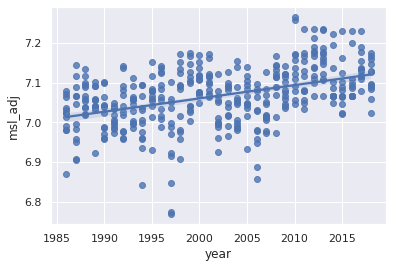

In [ ]:
sns.regplot(x="year", y="msl_adj", data=df);

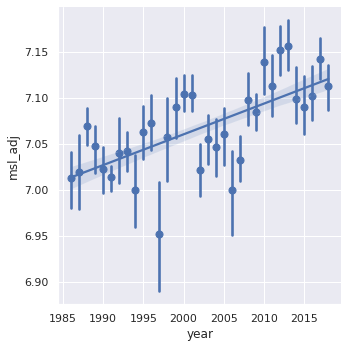

In [ ]:
sns.lmplot(x="year", y="msl_adj", data=df, x_estimator=np.mean);

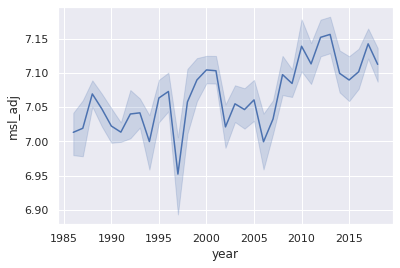

In [ ]:
sns.lineplot(data=df, x="year", y="msl_adj")

# Importing Northern Hemisphere Sea Ice Data

**The csv dataset is the Northern Hemisphere Daily Data from 1978 to February 2022.**

*   The dataset is sourced from the Sea Ice Index compiled by the National Snow Ice Center. The link to the source [Sea Ice Index](https://nsidc.org/data/seaice_index)

*   The extent is measured in million square kilometres (10^6 sq km)

*   For this project, I have uploaded the dataset into my Kaggle [link](https://www.kaggle.com/harrithshaz/daily-sea-and-ice-index-1978-to-feb-2022)

*   However, in order to facilitate in accessing the dataset publicly and avoiding having to put in any Kaggle API credentials, I have uploaded the csv on my github. [link](https://github.com/shazmanshaz)

In [ ]:
# Reading the csv file obtained from github url into pandas dataset
df_north = pd.read_csv("https://raw.githubusercontent.com/shazmanshaz/North-Hemisphere-Sea-Ice-Extent-dataset-1978-to-Feb-2022/main/N_seaice_extent_daily_v3.0.csv")
df_north

,Year,Month,Day,Extent,Missing,Source Data
0,YYYY,MM,DD,10^6 sq km,10^6 sq km,Source data product web sites: http://nsidc.o...
1,1978,10,26,10.231,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
2,1978,10,28,10.420,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
3,1978,10,30,10.557,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
4,1978,11,01,10.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...
...,...,...,...,...,...,...
14177,2022,02,26,14.746,0.000,['/ecs/DP1/PM/NSIDC-0081.001/2022.02.25/nt_202...
14178,2022,02,27,14.678,0.000,['/ecs/DP1/PM/NSIDC-0081.001/2022.02.26/nt_202...
14179,2022,02,28,14.671,0.000,['/ecs/DP1/PM/NSIDC-0081.001/2022.02.27/nt_202...
14180,2022,03,01,14.693,0.000,['/ecs/DP1/PM/NSIDC-0081.001/2022.02.28/nt_202...


**Cleaning the Dataset**


---


The dataset above shows that on the first row the data are header names. So for this part I am going to push the first row up to become the column headers of the dataset, while reseting the numbering of the index.

In [ ]:
# push up the first row to become column headers and to reset the index numbering
df_north.rename(columns=df_north.iloc[0, :], inplace=True) 
df_north.drop(df_north.index[0], inplace=True)
df_north = df_north.reset_index(drop=True)
df_north.head()

,YYYY,MM,DD,10^6 sq km,10^6 sq km,Source data product web sites: http://nsidc.org/data/nsidc-0081.html and http://nsidc.org/data/nsidc-0051.html
0,1978,10,26,10.231,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
1,1978,10,28,10.420,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
2,1978,10,30,10.557,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
3,1978,11,01,10.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...
4,1978,11,03,10.777,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.03/nt_19...


Now the first row have become column headers, I encountered some errors when trying to change the column names. Hence I retrieve the list of the column names to see if the names are properly formatted.

In [ ]:
# retrieve column header names
list(df_north.columns)

['YYYY',
 '    MM',
 '  DD',
 ' 10^6 sq km',
 ' 10^6 sq km',
 ' Source data product web sites: http://nsidc.org/data/nsidc-0081.html and http://nsidc.org/data/nsidc-0051.html']

As seen above, there are odd spacings in the 'MM' and 'DD' columns. From the list, I can now rename the column header names.

In [ ]:
# rename the column header names
df_north.rename(columns={"YYYY": "Year", "    MM": "Month", "  DD": "Day", " 10^6 sq km":"North_Extent", " 10^6 sq km": "Missing", " Source data product web sites: http://nsidc.org/data/nsidc-0081.html and http://nsidc.org/data/nsidc-0051.html": "Source Data" }, inplace=True)
list(df_north.columns)

['Year', 'Month', 'Day', 'Missing', 'Missing', 'Source Data']

I noticed that there was duplicate column name '10^6 sq km'. Though I have assigned the respective new header names being 'North Extent' and 'Missing', it returned both columns as 'Missing' instead. So, I have to drop the duplicate column.

In [ ]:
# drop the duplicate column
df_north = df_north.loc[:,~df_north.columns.duplicated()]
df_north.head()

,Year,Month,Day,Missing,Source Data
0,1978,10,26,10.231,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
1,1978,10,28,10.420,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
2,1978,10,30,10.557,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
3,1978,11,01,10.670,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...
4,1978,11,03,10.777,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.03/nt_19...


I also want to drop the 'Day' and 'Source Data' columns.

In [ ]:
# drop the 'Day' and 'Source Data' columns
cols = [2, 4]
df_north.drop(df_north.columns[cols], axis=1, inplace=True)
df_north.head()

,Year,Month,Missing
0,1978,10,10.231
1,1978,10,10.420
2,1978,10,10.557
3,1978,11,10.670
4,1978,11,10.777


The 'Missing' column shall be renamed back to 'North Extent'.

In [ ]:
# rename 'Missing' to 'North Extent'
df_north.rename(columns={"Missing": "North_Extent"}, inplace=True)
list(df_north.columns)

['Year', 'Month', 'North_Extent']

**Converting the data**


---


In order to format the dataset, the following data are to be in this format


*   Year and Month data are to be combined and converted to datetime
*   North Extent data are to be float

In [ ]:
# retrieve the type of data in the dataset
df_north.dtypes

Year            object
Month           object
North_Extent    object
dtype: object

It is found that all the data in the dataset are object. Hence firstly, the North Extent data are to be converted to float.

In [ ]:
# coverting North Extent data to float
df_north['North_Extent'] = df_north['North_Extent'].astype(float)
df_north.dtypes

Year             object
Month            object
North_Extent    float64
dtype: object

Secondly is to concat Year and Month columns into Year-Month columns, and covert to datetime.

In [ ]:
# concat Year and Month into 'Year-Month' column and convert to datetime
df_north['Year_Month'] = pd.to_datetime(df_north[['Year', 'Month']].assign(Day=1))
df_north.head()

,Year,Month,North_Extent,Year_Month
0,1978,10,10.231,1978-10-01
1,1978,10,10.420,1978-10-01
2,1978,10,10.557,1978-10-01
3,1978,11,10.670,1978-11-01
4,1978,11,10.777,1978-11-01


The Year and Month colums are no longer required hence they are to be dropped.

In [ ]:
# drop Year and Month columns
cols = [0, 1]
df_north.drop(df_north.columns[cols], axis=1, inplace=True)
print(df_north.columns)

Index(['North_Extent', 'Year_Month'], dtype='object')


Finally, to reposition the columns so that 'Year-Month' becomes the first column

In [ ]:
# repositioning the columns
df_north=df_north.reindex(columns= ['Year_Month', 'North_Extent'])
df_north.head()

,Year_Month,North_Extent
0,1978-10-01,10.231
1,1978-10-01,10.420
2,1978-10-01,10.557
3,1978-11-01,10.670
4,1978-11-01,10.777


The dataset have been reformated as such:

Year and Month data are to be combined and converted to datetime

*   Year-Month : datetime
*   North Extent: float

*Note: North Extent data is measured in million square kilometres (10^6 sq km)*

In [ ]:
# retrieve the data type
df_north.dtypes

Year_Month      datetime64[ns]
North_Extent           float64
dtype: object

**Reshaping the Dataset**


---

The dataset we currently have show there are three (3) readings a month on the Sea Ice extent in the Northern Hemisphere. 

Hence, in the Year-Month column there are several rows with the same date. As I would be using this dataset for analysis, I plan to merge the rows with the same date. As for the respective North Extent data, they shall merged into average amount.

Firstly is to have an overview of the dataset.

In [ ]:
print(df_north) # to print overview of dataset
print('Size = ', df_north.size) # to print how many data input in the dataframe
print('Dimension = ', df_north.ndim) # to print the dimension of the dataframe
print('Shape = ', df_north.shape) # to print the number of rows and columns in the dataframe

      Year_Month  North_Extent
0     1978-10-01        10.231
1     1978-10-01        10.420
2     1978-10-01        10.557
3     1978-11-01        10.670
4     1978-11-01        10.777
...          ...           ...
14176 2022-02-01        14.746
14177 2022-02-01        14.678
14178 2022-02-01        14.671
14179 2022-03-01        14.693
14180 2022-03-01        14.765

[14181 rows x 2 columns]
Size =  28362
Dimension =  2
Shape =  (14181, 2)


In [ ]:
# merge the row with the same date and finding the average amount of the North Extent data
df_north = df_north.groupby("Year_Month", sort=False)["North_Extent"].mean().reset_index()\
  .rename(columns={"North_Extent":"North_Extent"})

df_north

,Year_Month,North_Extent
0,1978-10-01,10.402667
1,1978-11-01,11.645133
2,1978-12-01,13.667063
3,1979-01-01,15.414000
4,1979-02-01,16.175286
...,...,...
517,2021-11-01,9.808500
518,2021-12-01,12.194000
519,2022-01-01,13.877419
520,2022-02-01,14.614179


In [ ]:
# rounding up North Extent float to three decimal
pd.options.display.float_format = "{:,.3f}".format
df_north

,Year_Month,North_Extent
0,1978-10-01,10.403
1,1978-11-01,11.645
2,1978-12-01,13.667
3,1979-01-01,15.414
4,1979-02-01,16.175
...,...,...
517,2021-11-01,9.809
518,2021-12-01,12.194
519,2022-01-01,13.877
520,2022-02-01,14.614


In [ ]:
print(df_north) # to print overview of dataset
print('Size = ', df_north.size) # to print how many data input in the dataframe
print('Dimension = ', df_north.ndim) # to print the dimension of the dataframe
print('Shape = ', df_north.shape) # to print the number of rows and columns in the dataframe

    Year_Month  North_Extent
0   1978-10-01        10.403
1   1978-11-01        11.645
2   1978-12-01        13.667
3   1979-01-01        15.414
4   1979-02-01        16.175
..         ...           ...
517 2021-11-01         9.809
518 2021-12-01        12.194
519 2022-01-01        13.877
520 2022-02-01        14.614
521 2022-03-01        14.729

[522 rows x 2 columns]
Size =  1044
Dimension =  2
Shape =  (522, 2)


In [ ]:
# drop any rows under North Extent that has Nan value.
df_north.dropna(subset = ["North_Extent"], inplace=True)

In [ ]:
print(df_north) # to print overview of dataset
print('Size = ', df_north.size) # to print how many data input in the dataframe
print('Dimension = ', df_north.ndim) # to print the dimension of the dataframe
print('Shape = ', df_north.shape) # to print the number of rows and columns in the dataframe

    Year_Month  North_Extent
0   1978-10-01        10.403
1   1978-11-01        11.645
2   1978-12-01        13.667
3   1979-01-01        15.414
4   1979-02-01        16.175
..         ...           ...
517 2021-11-01         9.809
518 2021-12-01        12.194
519 2022-01-01        13.877
520 2022-02-01        14.614
521 2022-03-01        14.729

[522 rows x 2 columns]
Size =  1044
Dimension =  2
Shape =  (522, 2)


# Importing Southern Hemisphere Sea Ice Data

**The csv dataset is the Southern Hemisphere Daily Data from 1978 to February 2022.**

*   The dataset is sourced from the Sea Ice Index compiled by the National Snow Ice Center. The link to the source [Sea Ice Index](https://nsidc.org/data/seaice_index)

*   The extent is measured in million square kilometres (10^6 sq km)

*   For this project, I have uploaded the dataset into my Kaggle [link](https://www.kaggle.com/harrithshaz/daily-sea-and-ice-index-1978-to-feb-2022)

*   However, in order to facilitate in accessing the dataset publicly and avoiding having to put in any Kaggle API credentials, I have uploaded the csv on my github. [link](https://github.com/shazmanshaz)

In [ ]:
# Reading the csv file obtained from github url into pandas dataset
df_south = pd.read_csv("https://raw.githubusercontent.com/shazmanshaz/South-Hemisphere-Sea-Ice-Extent-dataset-1978-to-Feb-2022/main/S_seaice_extent_daily_v3.0.csv")
df_south

,Year,Month,Day,Extent,Missing,Source Data
0,YYYY,MM,DD,10^6 sq km,10^6 sq km,Source data product web sites: http://nsidc.o...
1,1978,10,26,17.624,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
2,1978,10,28,17.803,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
3,1978,10,30,17.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
4,1978,11,01,17.527,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...
...,...,...,...,...,...,...
14177,2022,02,26,1.953,0.000,['/ecs/DP1/PM/NSIDC-0081.001/2022.02.25/nt_202...
14178,2022,02,27,1.929,0.000,['/ecs/DP1/PM/NSIDC-0081.001/2022.02.26/nt_202...
14179,2022,02,28,1.947,0.000,['/ecs/DP1/PM/NSIDC-0081.001/2022.02.27/nt_202...
14180,2022,03,01,1.991,0.000,['/ecs/DP1/PM/NSIDC-0081.001/2022.02.28/nt_202...


**Cleaning the Dataset**


---


The dataset above shows that on the first row the data are header names. So for this part I am going to push the first row up to become the column headers of the dataset, while reseting the numbering of the index.

In [ ]:
# push up the first row to become column headers and to reset the index numbering
df_south.rename(columns=df_south.iloc[0, :], inplace=True) 
df_south.drop(df_south.index[0], inplace=True)
df_south= df_south.reset_index(drop=True)
df_south.head()

,YYYY,MM,DD,10^6 sq km,10^6 sq km,Source data product web sites: http://nsidc.org/data/nsidc-0081.html and http://nsidc.org/data/nsidc-0051.html
0,1978,10,26,17.624,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
1,1978,10,28,17.803,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
2,1978,10,30,17.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
3,1978,11,01,17.527,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...
4,1978,11,03,17.486,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.03/nt_19...


Now the first row have become column headers, I encountered some errors when trying to change the column names. Hence I retrieve the list of the column names to see if the names are properly formatted.

In [ ]:
# retrieve column header names
list(df_south.columns)

['YYYY',
 '    MM',
 '  DD',
 ' 10^6 sq km',
 ' 10^6 sq km',
 ' Source data product web sites: http://nsidc.org/data/nsidc-0081.html and http://nsidc.org/data/nsidc-0051.html']

As seen above, there are odd spacings in the 'MM' and 'DD' columns. From the list, I can now rename the column header names.

In [ ]:
# rename the column header names
df_south.rename(columns={"YYYY": "Year", "    MM": "Month", "  DD": "Day", " 10^6 sq km":"South_Extent", " 10^6 sq km": "Missing", " Source data product web sites: http://nsidc.org/data/nsidc-0081.html and http://nsidc.org/data/nsidc-0051.html": "Source Data" }, inplace=True)
list(df_south.columns)

['Year', 'Month', 'Day', 'Missing', 'Missing', 'Source Data']

I noticed that there was duplicate column name '10^6 sq km'. Though I have assigned the respective new header names being 'South Extent' and 'Missing', it returned both columns as 'Missing' instead. So, I have to drop the duplicate column.

In [ ]:
# drop the duplicate column
df_south = df_south.loc[:,~df_south.columns.duplicated()]
df_south.head()

,Year,Month,Day,Missing,Source Data
0,1978,10,26,17.624,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
1,1978,10,28,17.803,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
2,1978,10,30,17.670,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
3,1978,11,01,17.527,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...
4,1978,11,03,17.486,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.03/nt_19...


I also want to drop the 'Day' and 'Source Data' columns.

In [ ]:
# drop the 'Day' and 'Source Data' columns
cols = [2, 4]
df_south.drop(df_south.columns[cols], axis=1, inplace=True)
df_south.head()

,Year,Month,Missing
0,1978,10,17.624
1,1978,10,17.803
2,1978,10,17.670
3,1978,11,17.527
4,1978,11,17.486


The 'Missing' column shall be renamed back to 'South Extent'.

In [ ]:
# rename 'Missing' to 'South Extent'
df_south.rename(columns={"Missing": "South_Extent"}, inplace=True)
list(df_south.columns)

['Year', 'Month', 'South_Extent']

**Converting the data**


---


In order to format the dataset, the following data are to be in this format


*   Year and Month data are to be combined and converted to datetime
*   South Extent data are to be float

In [ ]:
# retrieve the type of data in the dataset
df_south.dtypes

Year            object
Month           object
South_Extent    object
dtype: object

It is found that all the data in the dataset are object. Hence firstly, the North Extent data are to be converted to float.

In [ ]:
# coverting South Extent data to float
df_south['South_Extent'] = df_south['South_Extent'].astype(float)
df_south.dtypes

Year             object
Month            object
South_Extent    float64
dtype: object

Secondly is to concat Year and Month columns into Year-Month columns, and covert to datetime.

In [ ]:
# concat Year and Month into 'Year-Month' column and convert to datetime
df_south['Year_Month'] = pd.to_datetime(df_south[['Year', 'Month']].assign(Day=1))
df_south.head()

,Year,Month,South_Extent,Year_Month
0,1978,10,17.624,1978-10-01
1,1978,10,17.803,1978-10-01
2,1978,10,17.670,1978-10-01
3,1978,11,17.527,1978-11-01
4,1978,11,17.486,1978-11-01


The Year and Month colums are no longer required hence they are to be dropped.

In [ ]:
# drop Year and Month columns
cols = [0, 1]
df_south.drop(df_south.columns[cols], axis=1, inplace=True)
print(df_south.columns)

Index(['South_Extent', 'Year_Month'], dtype='object')


Finally, to reposition the columns so that 'Year-Month' becomes the first column

In [ ]:
# repositioning the columns
df_south=df_south.reindex(columns= ['Year_Month', 'South_Extent'])
df_south.head()

,Year_Month,South_Extent
0,1978-10-01,17.624
1,1978-10-01,17.803
2,1978-10-01,17.670
3,1978-11-01,17.527
4,1978-11-01,17.486


The dataset have been reformated as such:

Year and Month data are to be combined and converted to datetime

*   Year-Month : datetime
*   South Extent: float

*Note: South Extent data is measured in million square kilometres (10^6 sq km)*

In [ ]:
# retrieve the data type
df_south.dtypes

Year_Month      datetime64[ns]
South_Extent           float64
dtype: object

**Reshaping the Dataset**


---

The dataset we currently have show there are three (3) readings a month on the Sea Ice extent in the Southern Hemisphere. 

Hence, in the Year-Month column there are several rows with the same date. As I would be using this dataset for analysis, I plan to merge the rows with the same date. As for the respective South Extent data, they shall merged into average amount.

In [ ]:
print(df_south) # to print overview of dataset
print('Size = ', df_south.size) # to print how many data input in the dataframe
print('Dimension = ', df_south.ndim) # to print the dimension of the dataframe
print('Shape = ', df_south.shape) # to print the number of rows and columns in the dataframe

      Year_Month  South_Extent
0     1978-10-01        17.624
1     1978-10-01        17.803
2     1978-10-01        17.670
3     1978-11-01        17.527
4     1978-11-01        17.486
...          ...           ...
14176 2022-02-01         1.953
14177 2022-02-01         1.929
14178 2022-02-01         1.947
14179 2022-03-01         1.991
14180 2022-03-01         2.008

[14181 rows x 2 columns]
Size =  28362
Dimension =  2
Shape =  (14181, 2)


In [ ]:
# merge the row with the same date and finding the average amount of the South Extent data
df_south = df_south.groupby("Year_Month", sort=False)["South_Extent"].mean().reset_index()\
  .rename(columns={"South_Extent":"South_Extent"})

df_south

,Year_Month,South_Extent
0,1978-10-01,17.699
1,1978-11-01,15.896
2,1978-12-01,10.395
3,1979-01-01,5.402
4,1979-02-01,3.141
...,...,...
517,2021-11-01,14.950
518,2021-12-01,9.090
519,2022-01-01,3.856
520,2022-02-01,2.159


In [ ]:
# rounding up South Extent float to three decimal
pd.options.display.float_format = "{:,.3f}".format
df_south

,Year_Month,South_Extent
0,1978-10-01,17.699
1,1978-11-01,15.896
2,1978-12-01,10.395
3,1979-01-01,5.402
4,1979-02-01,3.141
...,...,...
517,2021-11-01,14.950
518,2021-12-01,9.090
519,2022-01-01,3.856
520,2022-02-01,2.159


In [ ]:
print(df_south) # to print overview of dataset
print('Size = ', df_south.size) # to print how many data input in the dataframe
print('Dimension = ', df_south.ndim) # to print the dimension of the dataframe
print('Shape = ', df_south.shape) # to print the number of rows and columns in the dataframe

    Year_Month  South_Extent
0   1978-10-01        17.699
1   1978-11-01        15.896
2   1978-12-01        10.395
3   1979-01-01         5.402
4   1979-02-01         3.141
..         ...           ...
517 2021-11-01        14.950
518 2021-12-01         9.090
519 2022-01-01         3.856
520 2022-02-01         2.159
521 2022-03-01         2.000

[522 rows x 2 columns]
Size =  1044
Dimension =  2
Shape =  (522, 2)


In [ ]:
# drop any rows under South Extent that has Nan value.
df_south.dropna(subset = ["South_Extent"], inplace=True)

In [ ]:
print(df_south) # to print overview of dataset
print('Size = ', df_south.size) # to print how many data input in the dataframe
print('Dimension = ', df_south.ndim) # to print the dimension of the dataframe
print('Shape = ', df_south.shape) # to print the number of rows and columns in the dataframe

    Year_Month  South_Extent
0   1978-10-01        17.699
1   1978-11-01        15.896
2   1978-12-01        10.395
3   1979-01-01         5.402
4   1979-02-01         3.141
..         ...           ...
517 2021-11-01        14.950
518 2021-12-01         9.090
519 2022-01-01         3.856
520 2022-02-01         2.159
521 2022-03-01         2.000

[522 rows x 2 columns]
Size =  1044
Dimension =  2
Shape =  (522, 2)


# Reshaping the Mean Sea Level dataset

After obtaining the Northern and Southern Hemisphere dataset, it is necessary to reshape the Mean Sea Level dataset. This is because the Mean Sea Level dataset shall be concat with the Northern and Southern Hemisphere dataset.

In [ ]:
# reassign the Mean Sea Level dataset
df_msl = df
df_msl

,year,month,NOAA_adjusted_MSL,NOAA_unverified,NOAA_linear_trend,NOAA_high_conf,NOAA_low_conf,PSMSL_rlr_MSL,PSMSL_num_missing_days,PSMSL_dataflag,NOAA_raw_MSL,NOAA_interpolated,msl_raw,msl_adj
0,1986,1,NaN,NaN,NaN,NaN,NaN,6879,0,000,NaN,NaN,6.879,6.990
1,1986,2,NaN,NaN,NaN,NaN,NaN,6837,0,000,NaN,NaN,6.837,6.980
2,1986,3,NaN,NaN,NaN,NaN,NaN,6880,0,000,NaN,NaN,6.880,6.980
3,1986,4,NaN,NaN,NaN,NaN,NaN,7020,0,000,NaN,NaN,7.020,7.030
4,1986,5,NaN,NaN,NaN,NaN,NaN,7145,0,000,NaN,NaN,7.145,7.063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,2018,8,NaN,NaN,NaN,NaN,NaN,7228,0,000,NaN,NaN,7.228,7.175
392,2018,9,NaN,NaN,NaN,NaN,NaN,7105,0,000,NaN,NaN,7.105,7.084
393,2018,10,NaN,NaN,NaN,NaN,NaN,7150,0,000,NaN,NaN,7.150,7.094
394,2018,11,NaN,NaN,NaN,NaN,NaN,7222,0,000,NaN,NaN,7.222,7.159


In [ ]:
# drop all columns except year, month and msl_adj
cols = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
df_msl.drop(df_msl.columns[cols], axis=1, inplace=True)
print(df_msl.columns)

Index(['year', 'month', 'msl_adj'], dtype='object')


In [ ]:
# retrieve the type of data in the dataset
df_msl.dtypes

year         int64
month        int64
msl_adj    float64
dtype: object

In [ ]:
# concat year and month into 'Year-Month' column and convert to datetime
df_msl['Year_Month'] = pd.to_datetime(df_msl[['year', 'month']].assign(Day=1))
df_msl.head()

,year,month,msl_adj,Year_Month
0,1986,1,6.990,1986-01-01
1,1986,2,6.980,1986-02-01
2,1986,3,6.980,1986-03-01
3,1986,4,7.030,1986-04-01
4,1986,5,7.063,1986-05-01


In [ ]:
# drop year and month columns
cols = [0, 1]
df_msl.drop(df_msl.columns[cols], axis=1, inplace=True)
print(df_msl.columns)

Index(['msl_adj', 'Year_Month'], dtype='object')


In [ ]:
# rename the column header names
df_msl.rename(columns={"msl_adj": "Mean_Sea_Level", "Year_Month": "Year_Month"}, inplace=True)
list(df_msl.columns)

['Mean_Sea_Level', 'Year_Month']

In [ ]:
# repositioning the columns
df_msl=df_msl.reindex(columns= ['Year_Month', 'Mean_Sea_Level'])
df_msl.head()

,Year_Month,Mean_Sea_Level
0,1986-01-01,6.990
1,1986-02-01,6.980
2,1986-03-01,6.980
3,1986-04-01,7.030
4,1986-05-01,7.063


In [ ]:
# retrieve the type of data in the dataset
df_msl.dtypes

Year_Month        datetime64[ns]
Mean_Sea_Level           float64
dtype: object

In [ ]:
# rounding up Mean Sea Level float to three decimal
pd.options.display.float_format = "{:,.3f}".format
df_msl

,Year_Month,Mean_Sea_Level
0,1986-01-01,6.990
1,1986-02-01,6.980
2,1986-03-01,6.980
3,1986-04-01,7.030
4,1986-05-01,7.063
...,...,...
391,2018-08-01,7.175
392,2018-09-01,7.084
393,2018-10-01,7.094
394,2018-11-01,7.159


After reshaping the Mean Sea Level table, the North Extent and South Extent datasets are concat together.

In [ ]:
from functools import reduce

MeanSeaLevel = reduce(lambda x,y: pd.merge(x,y, on='Year_Month', how='outer'), [df_msl, df_north, df_south])
MeanSeaLevel

,Year_Month,Mean_Sea_Level,North_Extent,South_Extent
0,1986-01-01,6.990,14.890,5.422
1,1986-02-01,6.980,15.785,3.193
2,1986-03-01,6.980,15.909,3.698
3,1986-04-01,7.030,15.059,6.386
4,1986-05-01,7.063,13.380,9.296
...,...,...,...,...
517,2021-11-01,NaN,9.809,14.950
518,2021-12-01,NaN,12.194,9.090
519,2022-01-01,NaN,13.877,3.856
520,2022-02-01,NaN,14.614,2.159


Initially I wanted to replace NaN values with zero. However, this has caused the graph to show an extreme drop. In addition, it is also not accurate to say the Mean Sea Level have dropped to zero as that would be impossible! Hence I would not use the code below.

In [ ]:
#MeanSeaLevel['Mean_Sea_Level'] = MeanSeaLevel['Mean_Sea_Level'].fillna(0)
#MeanSeaLevel

# Visualising the Langkawi Mean Sea Level Dataset

Based on the table below, I have an overview of the datasets I am working on and give some context to the graph I am building later.

In [ ]:
# describe the MeanSeaLevel dataset
MeanSeaLevel.describe()

,Mean_Sea_Level,North_Extent,South_Extent
count,396.000,522.000,522.000
mean,7.067,11.405,11.555
std,0.073,3.252,5.605
min,6.768,3.566,2.000
25%,7.024,8.614,5.789
50%,7.067,12.127,12.116
75%,7.115,14.319,16.979
max,7.266,16.342,19.756


To visuliase the data I'm working on, I use Seaborn to make a lineplot of the Mean Sea Level, the North Extent and the South Extent.

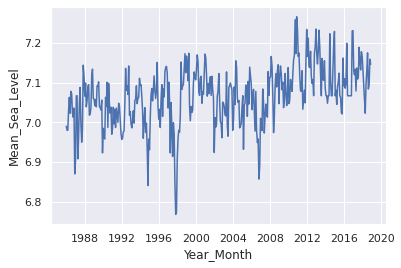

In [ ]:
sns.lineplot(data=MeanSeaLevel, x="Year_Month", y="Mean_Sea_Level")

The Mean Sea Level lineplot above shows a slight rising trend in the Mean Sea Level in Langkawi.

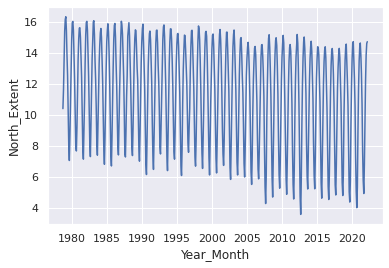

In [ ]:
sns.lineplot(data=MeanSeaLevel, x="Year_Month", y="North_Extent")

The North Extent lineplot above apears to have a consistent upward and downward plot on each year.

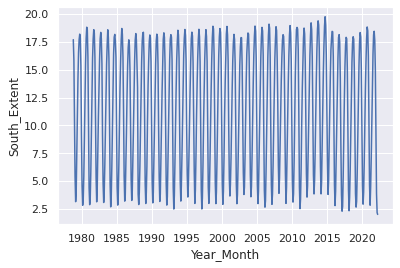

In [ ]:
sns.lineplot(data=MeanSeaLevel, x="Year_Month", y="South_Extent")

# Creating the Moving Average of the Arctic and Antartica Ice Mass

This is also the case with the South Extent lineplot. 

I find it hard to read the trend of the North Extent and South Extent. Hence, I proposed to use Moving Average of the North Extent and South Extent. After testing with various rolling days, I find 120 days shows the best to visualise the moving average.

In [ ]:
MeanSeaLevel['Moving_Average_North'] = MeanSeaLevel['North_Extent'].rolling(120).mean()
MeanSeaLevel.head()

,Year_Month,Mean_Sea_Level,North_Extent,South_Extent,Moving_Average_North
0,1986-01-01,6.990,14.890,5.422,NaN
1,1986-02-01,6.980,15.785,3.193,NaN
2,1986-03-01,6.980,15.909,3.698,NaN
3,1986-04-01,7.030,15.059,6.386,NaN
4,1986-05-01,7.063,13.380,9.296,NaN


# Visualising the Moving Average of the Arctic and Antartica Ice Mass

After creating a new column to show the Moving Average of the North Extent, I uses Seaborn to make a lineplot.

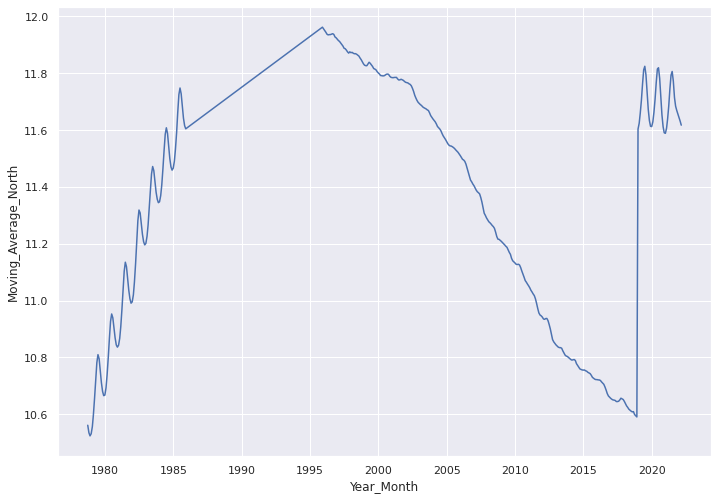

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(
    x='Year_Month',
    y='Moving_Average_North',
    data= MeanSeaLevel)
plt.show()

The moving average lineplot above gave a better visualisation of the ice mass trend in the Arctic.

I shall do the same for Antartica in the following lines of codes.

In [ ]:
MeanSeaLevel['Moving_Average_South'] = MeanSeaLevel['South_Extent'].rolling(120).mean()
MeanSeaLevel.head()

,Year_Month,Mean_Sea_Level,North_Extent,South_Extent,Moving_Average_North,Moving_Average_South
0,1986-01-01,6.990,14.890,5.422,NaN,NaN
1,1986-02-01,6.980,15.785,3.193,NaN,NaN
2,1986-03-01,6.980,15.909,3.698,NaN,NaN
3,1986-04-01,7.030,15.059,6.386,NaN,NaN
4,1986-05-01,7.063,13.380,9.296,NaN,NaN


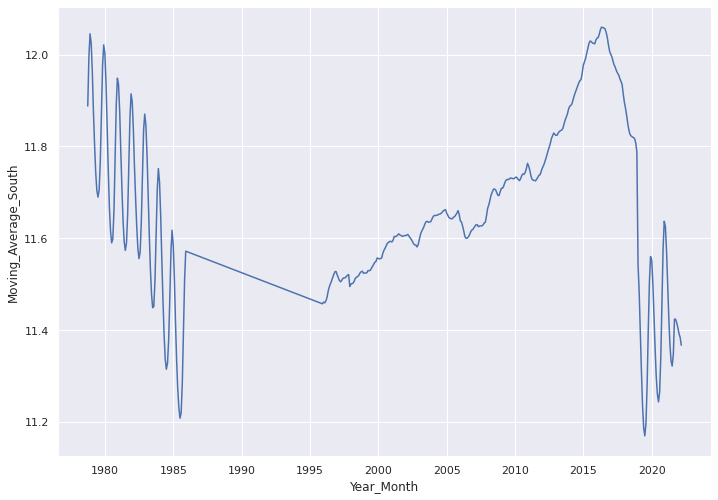

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(
    x='Year_Month',
    y='Moving_Average_South',
    data= MeanSeaLevel)
plt.show()

The moving average gives a better visualisation of the ice mass in the Arctic and Antartica over the years.

I find the moving average lineplot could make a good trend line over the actual lineplot. Hence, for better visualisation I plot the actual with the moving average as trend line indicator.

Text(0, 0.5, 'North Extent 10^6 Sq Km')

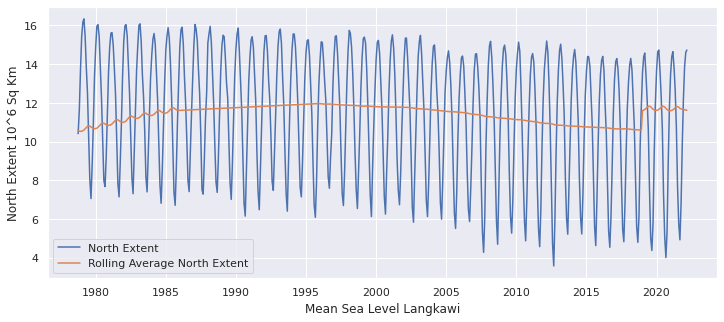

In [ ]:
# set figure size
plt.figure( figsize = ( 12, 5))
  
# plot a simple time series plot
# using seaborn.lineplot()
sns.lineplot( x = 'Year_Month',
             y = 'North_Extent',
             data = MeanSeaLevel,
             label = 'North Extent')
  
# plot using rolling average
sns.lineplot( x = 'Year_Month',
             y = 'Moving_Average_North',
             data = MeanSeaLevel,
             label = 'Rolling Average North Extent')
  
plt.xlabel('Mean Sea Level Langkawi')

plt.ylabel('North Extent 10^6 Sq Km')

Text(0, 0.5, 'South Extent 10^6 Sq Km')

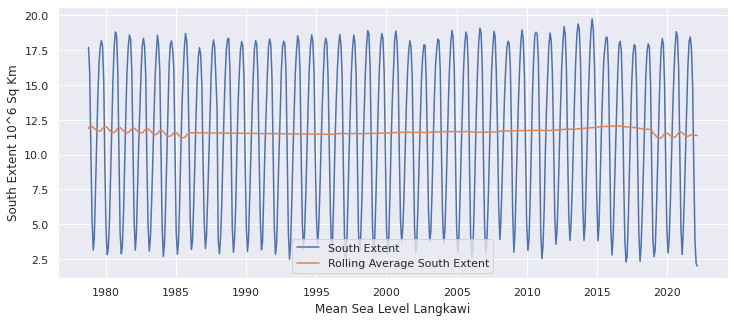

In [ ]:
# set figure size
plt.figure( figsize = ( 12, 5))
  
# plot a simple time series plot
# using seaborn.lineplot()
sns.lineplot( x = 'Year_Month',
             y = 'South_Extent',
             data = MeanSeaLevel,
             label = 'South Extent')
  
# plot using rolling average
sns.lineplot( x = 'Year_Month',
             y = 'Moving_Average_South',
             data = MeanSeaLevel,
             label = 'Rolling Average South Extent')
  
plt.xlabel('Mean Sea Level Langkawi')
  
plt.ylabel('South Extent 10^6 Sq Km')

From the above lineplot, both the North Extent and South Extent trend have been consistent. I did not find any extreme drop in the ice mass.

# Visualising the Moving Average of the Arctic and Antartica Ice Mass over the Mean Sea Level of Langkawi

For the next step, I proposed to put the moving average of the North Extent and the South Extent over the Mean Sea Level. 

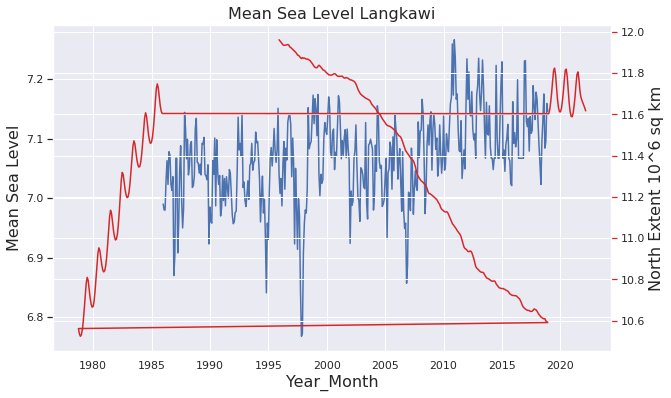

In [ ]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
#bar plot creation
ax1.set_title('Mean Sea Level Langkawi', fontsize=16)
ax1.set_xlabel('Year_Month', fontsize=16)
ax1.set_ylabel('Mean Sea Level', fontsize=16)
ax1 = sns.lineplot(x='Year_Month', y='Mean_Sea_Level', data = MeanSeaLevel, palette='summer')
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('North Extent 10^6 sq km', fontsize=16)
ax2 = sns.lineplot(x='Year_Month', y='Moving_Average_North', data = MeanSeaLevel, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

However, I found the the line in the moving average is not in order. 

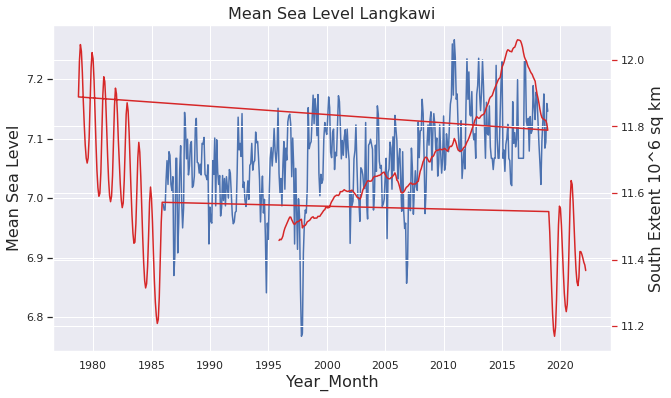

In [ ]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
#bar plot creation
ax1.set_title('Mean Sea Level Langkawi', fontsize=16)
ax1.set_xlabel('Year_Month', fontsize=16)
ax1.set_ylabel('Mean Sea Level', fontsize=16)
ax1 = sns.lineplot(x='Year_Month', y='Mean_Sea_Level', data = MeanSeaLevel, palette='summer')
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('South Extent 10^6 sq km', fontsize=16)
ax2 = sns.lineplot(x='Year_Month', y='Moving_Average_South', data = MeanSeaLevel, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

This is also the case for the South Extent moving average.

In [ ]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)

#print(MeanSeaLevel)

So in the code above, I printed the entire dataset and found the problem was the order of the date is not correct. This is the reason why the lines cross over eachother.

The next code shall put the date in order. Then I create the chart again.

In [ ]:
MeanSeaLevel = MeanSeaLevel.sort_values(by='Year_Month',ascending=True)
#print(MeanSeaLevel)
#MeanSeaLevel.head(10)

The following two charts are finally a good visualisation of the Mean Sea Level to the Moving average ice mass of the Arctic and Antartica.

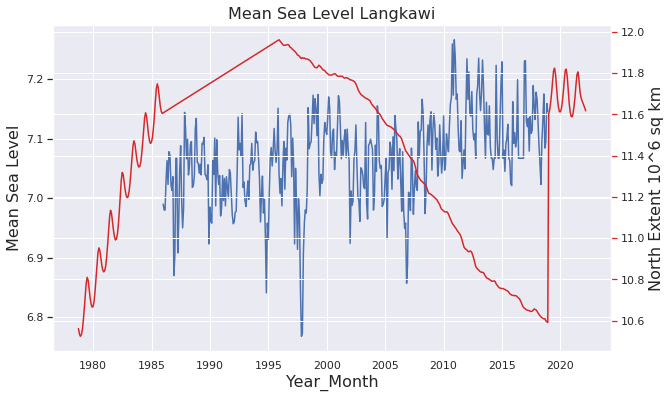

In [ ]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
#bar plot creation
ax1.set_title('Mean Sea Level Langkawi', fontsize=16)
ax1.set_xlabel('Year_Month', fontsize=16)
ax1.set_ylabel('Mean Sea Level', fontsize=16)
ax1 = sns.lineplot(x='Year_Month', y='Mean_Sea_Level', data = MeanSeaLevel, palette='summer')
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('North Extent 10^6 sq km', fontsize=16)
ax2 = sns.lineplot(x='Year_Month', y='Moving_Average_North', data = MeanSeaLevel, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

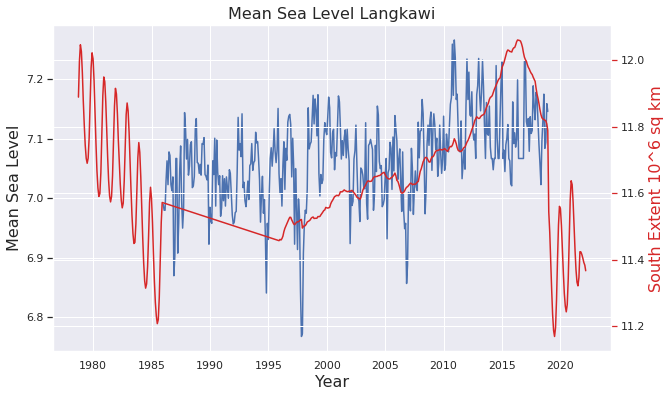

In [ ]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
#bar plot creation
ax1.set_title('Mean Sea Level Langkawi', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Mean Sea Level', fontsize=16)
ax1 = sns.lineplot(x='Year_Month', y='Mean_Sea_Level', data = MeanSeaLevel)
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('South Extent 10^6 sq km', fontsize=16, color=color)
ax2 = sns.lineplot(x='Year_Month', y='Moving_Average_South', data = MeanSeaLevel, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

# The final step is to import the dataset as CSV. I shall use this dataset for machine learning to forecast the Mean Sea Level with BigQuerry.

To create the csv file.

In [ ]:
MeanSeaLevel.to_csv('Langkawi_MSL.csv', index=False)

In [ ]:
from google.colab import files
files.download("Langkawi_MSL.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**END**